## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


8219 rows and 4 columns. Object, int, float, float

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
gdp_df= gdp_df.drop(["Value Footnotes"], axis=1)

In [9]:
gdp_df=gdp_df.rename(columns={"Country or Area":"Country", "Value":"GDP_Per_Capita"})

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [10]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2023     1992.424394
1     Afghanistan  2022     1981.710168
2     Afghanistan  2021     2144.166570
3     Afghanistan  2020     2769.685745
4     Afghanistan  2019     2927.245144
...           ...   ...             ...
8214     Zimbabwe  1994     3965.730986
8215     Zimbabwe  1993     3634.750494
8216     Zimbabwe  1992     3649.891947
8217     Zimbabwe  1991     4126.405247
8218     Zimbabwe  1990     4013.299059

[8219 rows x 3 columns]


In [11]:
gdp_df['Year'].nunique()

34

In [12]:
gdp_df_Year_Count=gdp_df.groupby(['Country']).count().sort_values(by='Year')

In [14]:
gdp_df_Year_Count[gdp_df_Year_Count['Year']>33]

,Year,GDP_Per_Capita
Country,,
Peru,34,34
Netherlands,34,34
New Zealand,34,34
Nicaragua,34,34
Niger,34,34
...,...,...
Heavily indebted poor countries (HIPC),34,34
High income,34,34
Honduras,34,34


In [15]:
gdp_df_Year_Count[gdp_df_Year_Count['Year']<34]

,Year,GDP_Per_Capita
Country,,
Djibouti,11,11
Turks and Caicos Islands,13,13
Sint Maarten (Dutch part),15,15
Faroe Islands,16,16
Kosovo,16,16
Cayman Islands,18,18
Virgin Islands,21,21
CuraÃ§ao,24,24
Afghanistan,24,24


In [16]:
gdp_df_Year_Count['Year'].value_counts().sort_index()

Year
11      1
13      1
15      1
16      2
18      1
21      1
24      2
26      1
27      1
29      1
30      1
32      1
33      5
34    228
Name: count, dtype: int64

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

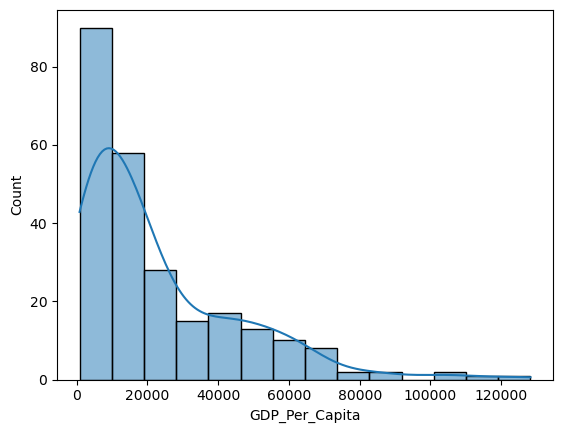

In [22]:
gdp_df_2020= gdp_df[gdp_df['Year'] == 2020]
sns.histplot(gdp_df_2020['GDP_Per_Capita'], kde=True)
plt.show()

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

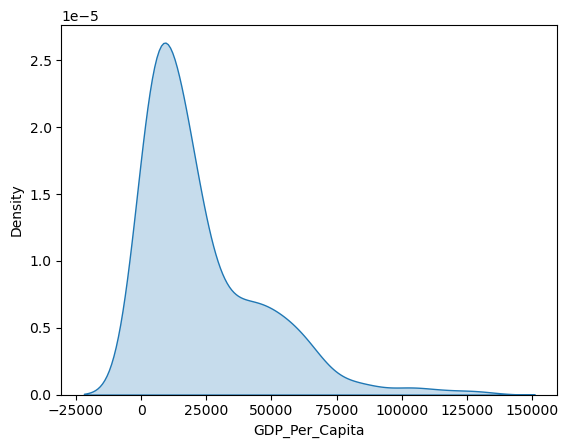

In [24]:
sns.kdeplot(gdp_df_2020['GDP_Per_Capita'], fill=True)

<Axes: xlabel='GDP_Per_Capita'>

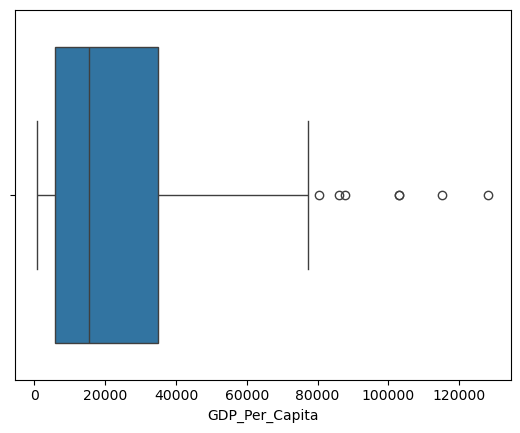

In [25]:
sns.boxplot(x=gdp_df_2020['GDP_Per_Capita'])

<Axes: ylabel='GDP_Per_Capita'>

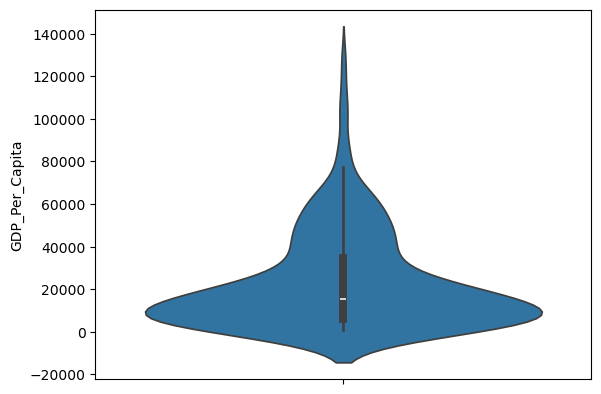

In [27]:
sns.violinplot(y=gdp_df_2020['GDP_Per_Capita'])

9. What was the median GDP per capita value in 2020?

In [29]:
gdp_df_2020['GDP_Per_Capita'].median()

15309.23598817024